### *import packages*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling and pre processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

# model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

# loading dataset

In [ ]:
from google.colab import files
dp = files.upload()


Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final (3).csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(dp['heart_statlog_cleveland_hungary_final.csv']))

In [ ]:
df1.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# data cleaning and preprocessing

In [ ]:
# renaming features to the proper name
df1.columns = ['age', 'sex','chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [ ]:
# converting features to categorical features
df1['chest_pain_type'][df1['chest_pain_type'] == 1] = 'typical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 2] = 'atypical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 3] = 'non-anginal pain'
df1['chest_pain_type'][df1['chest_pain_type'] == 4] = 'asymptomatic'



df1['rest_ecg'][df1['rest_ecg'] == 0] = 'normal'
df1['rest_ecg'][df1['rest_ecg'] == 1] = 'ST-T wave abnormality'
df1['rest_ecg'][df1['rest_ecg'] == 2] = 'left ventricular hypertropy'



df1['st_slope'][df1['st_slope'] == 1] = 'upsloping'
df1['st_slope'][df1['st_slope'] == 2] = 'flat'
df1['st_slope'][df1['st_slope'] == 3] = 'downsloping'




df1["sex"] = df1.sex.apply(lambda x:'male' if x==1 else 'female')

In [ ]:
df1['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [ ]:
df1['rest_ecg'].value_counts()

normal                         684
left ventricular hypertropy    325
ST-T wave abnormality          181
Name: rest_ecg, dtype: int64

In [ ]:
df1['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [ ]:
# dropping row with st_slope =0
df1.drop(df1[df1.st_slope ==0].index, inplace=True)

# checking distribution
df1['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [ ]:
# checking the top 5 entries of dataset after feature encoding
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [ ]:
# checking missing entries in the dataset columnwise
df1.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

Exploratory data analysis(EDA)

In [ ]:
# first checking the shape of the dataset
df1.shape

(1189, 12)

In [ ]:
# summary statistics of numerical columns
df1.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
# summary statistics of categorical columns
df1.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


In [ ]:
from matplotlib.figure import Figure

# distribution of heart disease(target variable)

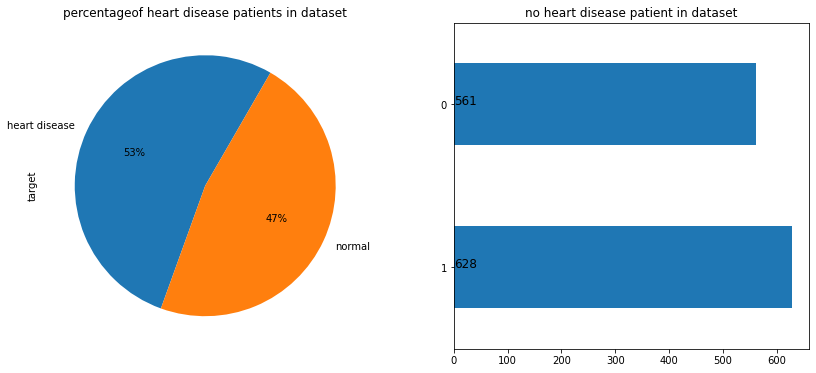

In [ ]:
# plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df1['target'].value_counts().plot.pie(x="heart disease" , y = 'no.of patients', autopct = "%1.0f%%",labels = ["heart disease","normal"],startangle = 60, ax = ax1);
ax1.set(title = 'percentageof heart disease patients in dataset')

ax2 = df1["target"].value_counts().plot(kind = "barh", ax = ax2)
for i,j in enumerate(df1["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'no heart disease patient in dataset')
plt.show()

# checking gender and agewise distribution

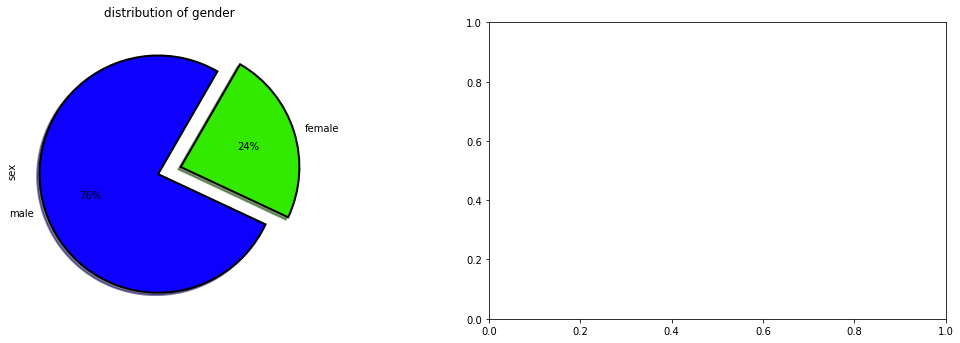

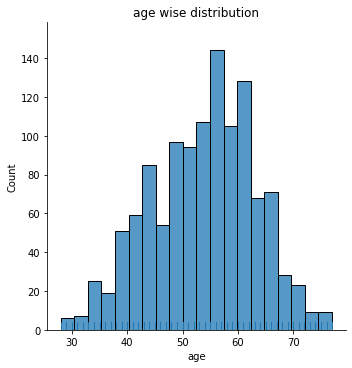

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df1["sex"].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette("prism",5),startangle = 60,labels = ["male","female"],wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.1,0.1],shadow = True)
plt.title("distribution of gender")
plt.subplot(222)
ax= sns.displot(df1['age'], rug=True)
plt.title("age wise distribution")
plt.show()

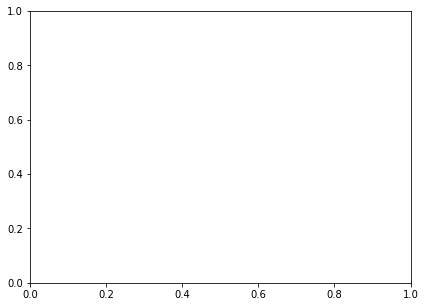

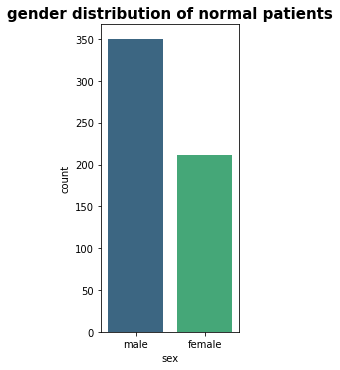

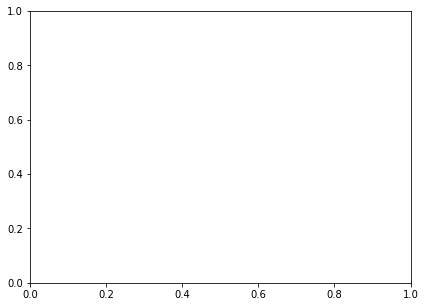

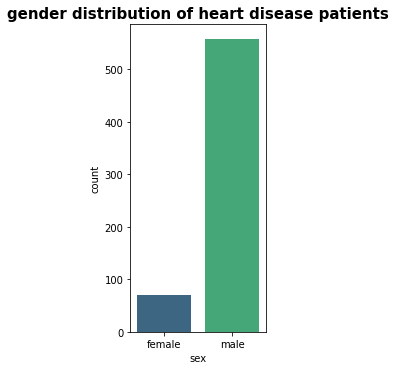

In [ ]:
# creating seperate data frequency for normal and heart patients

attr_1 = df1[df1['target']==1]

attr_0 = df1[df1['target']==0]

#plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.displot(attr_0['age'])
plt.title('age distribution of normal patients', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('gender distribution of normal patients', fontsize=15, weight='bold')
plt.show()

# plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.displot(attr_1['age'])
plt.title('gender distribution of normal patients', fontsize=15, weight = 'bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette = 'viridis')
plt.title('gender distribution of heart disease patients',fontsize=15, weight='bold')
plt.show()

# distribution of chest pain type

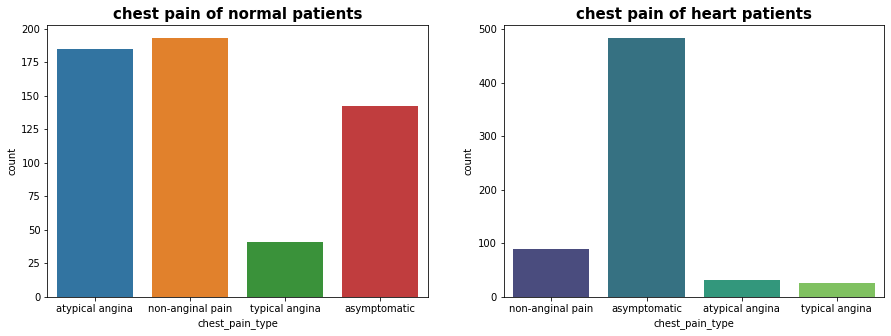

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('chest pain of normal patients',fontsize=15,weight='bold')

# plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'],palette = 'viridis')
plt.title('chest pain of heart patients', fontsize=15,weight='bold')
plt.show()

In [ ]:
# exploring the heart disease patients bad=sed on chest pain type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df1[plot_criteria[0]],df1[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


# destribution of rest ECG

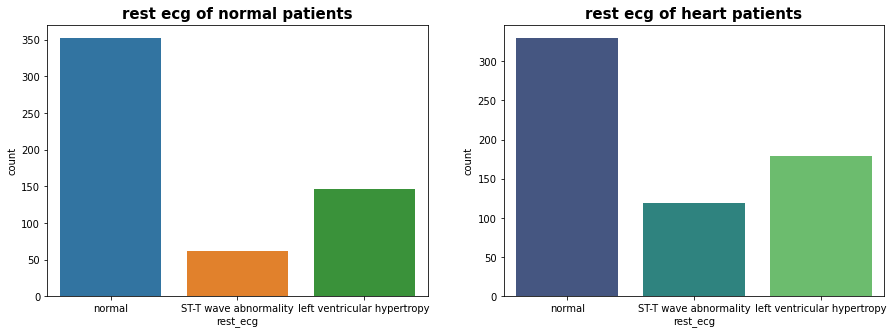

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('rest ecg of normal patients',fontsize=15, weight='bold')

# plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'],palette='viridis')
plt.title('rest ecg of heart patients', fontsize=15,weight='bold')
plt.show()

In [ ]:
# exploring the heart disease patients base on rest ecg
plot_criteria = ['rest_ecg', 'target']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df1[plot_criteria[0]],df1[plot_criteria[1]],normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertropy,26.020000,28.500000
normal,62.920000,52.550000


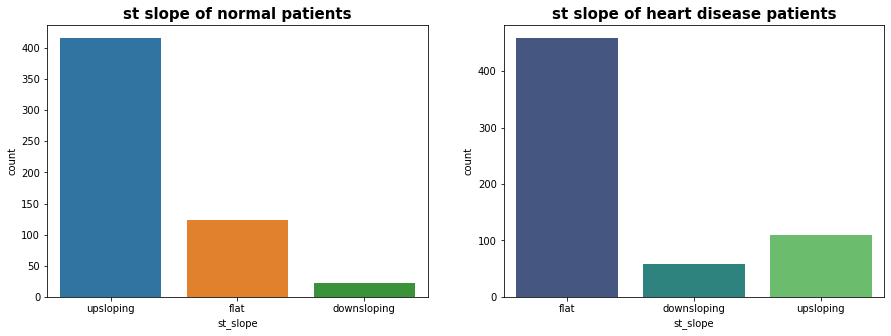

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('st slope of normal patients',fontsize=15,weight='bold')

# plottting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'],palette='viridis')
plt.title('st slope of heart disease patients', fontsize=15, weight='bold')
plt.show()

In [ ]:
# exploring the heart disease patients based on st slope
plot_criteria = ['st_slope','target']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df1[plot_criteria[0]],df1[plot_criteria[1]],normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


# istribution of numerical features

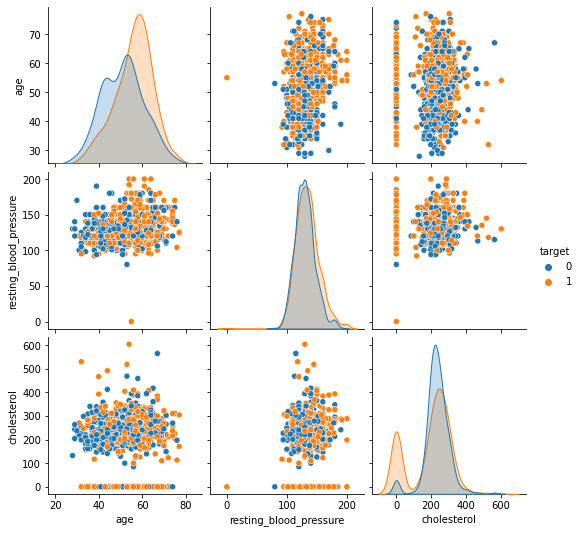

In [ ]:
sns.pairplot(df1, hue = 'target', vars= ['age', 'resting_blood_pressure', 'cholesterol'])

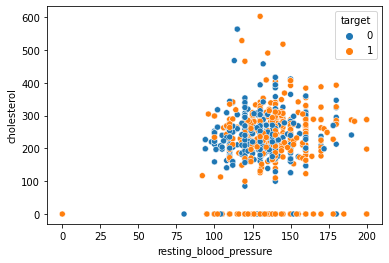

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure',y = 'cholesterol', hue = 'target', data = df1)

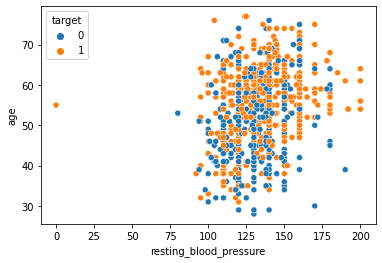

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df1)

# outlier detection removal

In [ ]:
# filtering numeric features as age,resting bp,cholesterol and max heart rate achieved has outliers as per eda
df1_numeric = df1[['age', 'resting_blood_pressure','cholesterol','max_heart_rate']]

In [ ]:
df1_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [ ]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(df1_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [ ]:
# defining threshold for filtering outliers
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [ ]:
# filtering outliers retaining only those data points which are below threshold
df1 = df1[(z < 3).all(axis=1)]

In [ ]:
# checking shape of dataset after outlier removed
df1.shape

(1172, 12)

In [ ]:
# encoding categorical variables
df1 = pd.get_dummies(df1, drop_first=True)

df1.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertropy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [ ]:
# checking the shape of dataset
df1.shape

(1172, 16)

In [ ]:
# segregating dataset into features i.e.,X and target variables i.e.,y
X = df1.drop(['target'],axis=1)
y = df1['target']

# checking correlation

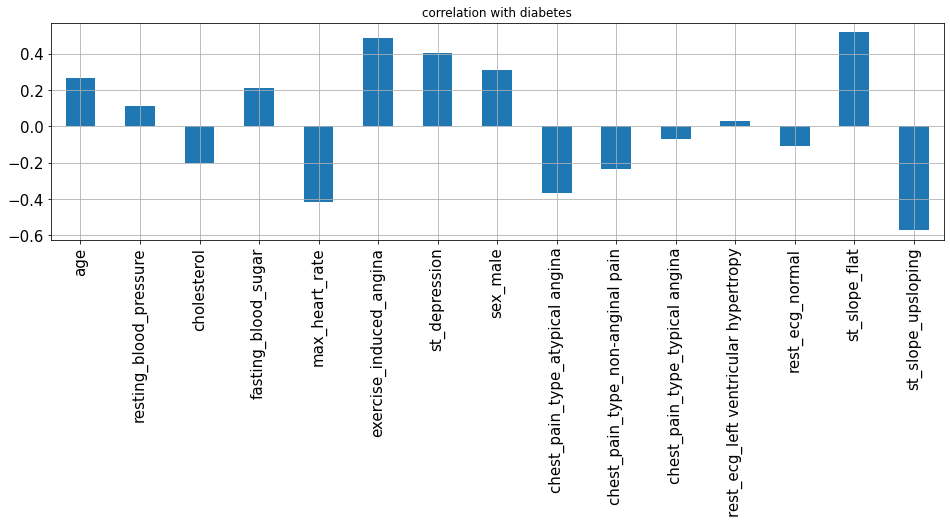

In [ ]:
# correlation with response variable class

X.corrwith(y).plot.bar(figsize = (16,4), title = "correlation with diabetes", fontsize = 15,rot = 90, grid = True)

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
## checking distribution of target variable in train test split
print('distribution of target variable in training set')
print(y_test.value_counts())

print('istribution of target variable in test set')
print(y_test.value_counts())

distribution of target variable in training set
1    123
0    112
Name: target, dtype: int64
istribution of target variable in test set
1    123
0    112
Name: target, dtype: int64


In [ ]:
print('----------training set-----------')
print(X_train.shape)
print(y_train.shape)

print('----------test set-------------')
print(X_test.shape)
print(y_test.shape)

----------training set-----------
(937, 15)
(937,)
----------test set-------------
(235, 15)
(235,)


# feature normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']])
X_train.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertropy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0


In [ ]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertropy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0


# cross validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


    return results,msg


In [ ]:
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.naive_bayes import GaussianNB
 from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.851704 (0.051909)
LDA: 0.854907 (0.049415)
KNN7: 0.851659 (0.047773)
KNN5: 0.843079 (0.043544)
KNN9: 0.857001 (0.040182)
KNN11: 0.852745 (0.039732)
CART: 0.869835 (0.026236)
NB: 0.845310 (0.048020)
SVM Linear: 0.852803 (0.052849)
SVM RBF: 0.852745 (0.044010)
AB: 0.853832 (0.028773)
GBM: 0.886891 (0.031619)
RF_Ent100: 0.930702 (0.033627)
RF_Gini100: 0.933871 (0.034841)
ET100: 0.923187 (0.030344)
ET500: 0.923187 (0.033194)
MLP: 0.868783 (0.039103)
SGD3000: 0.827168 (0.041839)
XGB_2000: 0.921082 (0.040058)
XGB_500: 0.926378 (0.033758)
XGB_100: 0.899703 (0.037175)
XGB_1000: 0.924274 (0.040144)
ET1000: 0.921048 (0.032317)


# Model building

random forest classifier(criterion='entropy')

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

multi layer perceptron

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

k nearest neighbour (n=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

extra tree classifier (n_estimation=500)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
et_100 = ExtraTreesClassifier(n_estimators=100)
et_100.fit(X_train,y_train)
y_pred_et100 = et_100.predict(X_test)

XGboost(n_estimators=500)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators=500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

support vector classifier(kernel='linear')


In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

stochastic gradient descent

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

adaboost classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

decision tree classifier(CART)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

gradient boosting machine

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

F1 score

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew-corrcoef
0,Random Forest,0.902128,0.873134,0.95122,0.848214,0.910506,0.899717,3.380449,0.806549


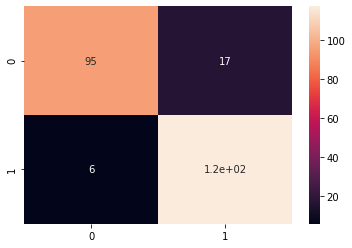

In [ ]:
CM = confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM,annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc = accuracy_score(y_test, y_pred_rfe)
roc = roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results = pd.DataFrame([['Random Forest',acc, prec, rec, specificity, f1, roc, loss_log, mathew]], columns = ['Model', 'Accuracy', 'Precision', 'Sensitivity','Specificity','F1 Score','ROC','Log_Loss','mathew-corrcoef'])

model_results

# comparisons with other models

In [ ]:
data = {             'MLP': y_pred_mlp,
                     'KNN': y_pred_knn,
                     'Extra tree classifier': y_pred_et100,
                     'XGB': y_pred_xgb,
                     'SVC': y_pred_sgd,
                     'SGD': y_pred_sgd,
                     'Adaboost': y_pred_ada,
                     'CART': y_pred_decc,
                     'GBM': y_pred_gbm }

models = pd.DataFrame(data)

for column in models:
  CM=confusion_matrix(y_test,models[column])

  TN = CM[0][0]
  FN = CM[1][0]
  TP = CM[1][1]
  FP = CM[0][1]
  specificity = TN/(TN+FP)
  loss_log = log_loss(y_test, models[column])
  acc = accuracy_score(y_test, models[column])
  roc = roc_auc_score(y_test, models[column])
  prec = precision_score(y_test, models[column])
  f1 = f1_score(y_test, models[column])

  mathew = matthews_corrcoef(y_test, models[column])
  results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]], columns = ['Model', 'Accuracy','precision', 'Sensitivity','Specificity','F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])
  model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew-corrcoef,precision,mathew_corrcoef
0,Random Forest,0.902128,0.873134,0.95122,0.848214,0.910506,0.899717,3.380449,0.806549,NaN,NaN
1,MLP,0.829787,NaN,0.95122,0.758929,0.846154,0.826619,5.879033,NaN,0.802920,0.661697
2,KNN,0.808511,NaN,0.95122,0.741071,0.826255,0.805495,6.613907,NaN,0.786765,0.618029
3,Extra tree classifier,0.893617,NaN,0.95122,0.839286,0.902724,0.891188,3.674399,NaN,0.865672,0.789339
4,XGB,0.919149,NaN,0.95122,0.892857,0.924303,0.917973,2.792538,NaN,0.906250,0.838384
5,SVC,0.791489,NaN,0.95122,0.732143,0.809339,0.788836,7.201804,NaN,0.776119,0.582813
6,SGD,0.791489,NaN,0.95122,0.732143,0.809339,0.788836,7.201804,NaN,0.776119,0.582813
7,Adaboost,0.834043,NaN,0.95122,0.776786,0.848249,0.831482,5.732052,NaN,0.813433,0.668866
8,CART,0.829787,NaN,0.95122,0.794643,0.841270,0.828216,5.879019,NaN,0.821705,0.658875
9,GBM,0.846809,NaN,0.95122,0.785714,0.860465,0.844077,5.291128,NaN,0.822222,0.695152


# ROC AUC Curve

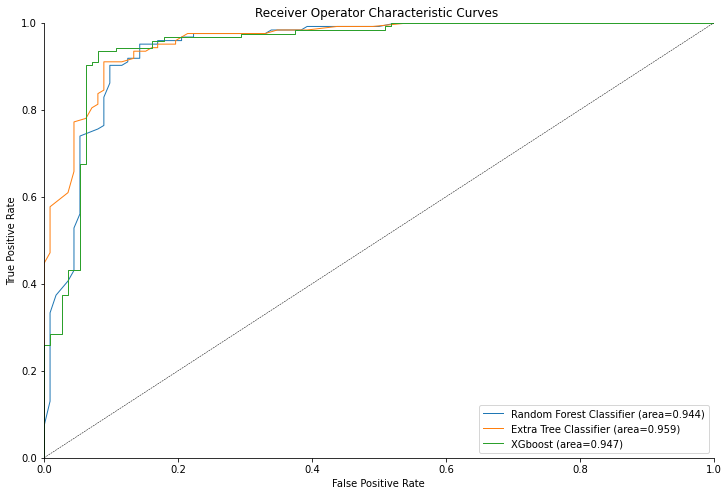

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
     from sklearn.metrics import roc_curve,roc_auc_score
     fpr,tpr,_ = roc_curve(y_true, y_proba[:,1])
     ax.plot(fpr, tpr, linestyle = l, linewidth = lw, label = "%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))
f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test, rf_ent.predict_proba(X_test), label = 'Random Forest Classifier',l='-')
roc_auc_plot(y_test, et_100.predict_proba(X_test), label = 'Extra Tree Classifier',l='-')
roc_auc_plot(y_test, xgb.predict_proba(X_test), label = 'XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')

ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Receiver Operator Characteristic Curves ')
sns.despine()

# Precision recall curve

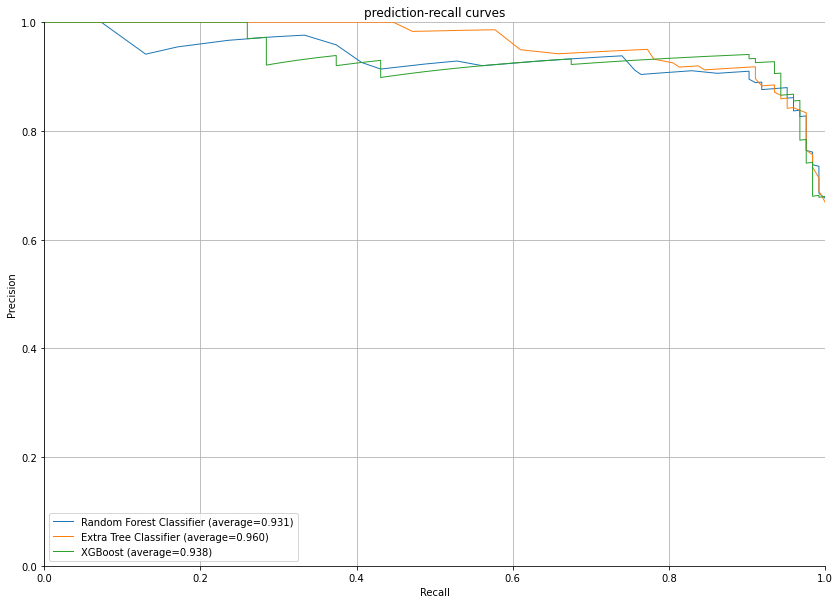

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ',l='-', lw=1.0):
     from sklearn.metrics import precision_recall_curve, average_precision_score
     precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1])
     average_precision = average_precision_score(y_test, y_proba[:,1], average = "micro")
     ax.plot(recall, precision, label='%s (average=%.3f)' %(label,average_precision),linestyle = l, linewidth = lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test, rf_ent.predict_proba(X_test),label='Random Forest Classifier',l='-')
precision_recall_plot(y_test, et_100.predict_proba(X_test),label='Extra Tree Classifier',l='-')
precision_recall_plot(y_test, xgb.predict_proba(X_test),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('prediction-recall curves')
sns.despine()

# Feature selection

In [ ]:
num_feats = 11

def cor_selector(X, y,num_feats):
  cor_list = []
  feature_name = X.columns.tolist()

  # calculate the correlation with y for each feature
  for i in X.columns.tolist():
    cor = np.corrcoef(X[i],y)[0,1]
    cor_list.append(cor)

  # replace NaN with 0
  cor_list = [0 if np.isnan(i) else i for i in cor_list]

  # feature name
  cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()

  # feature selection? 0 for not select, 1 for select
  cor_support = [True if i in cor_feature else False for i in feature_name]
  return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)),'selected features')

Fitting estimator with 15 features.
11 selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty='l2', solver='lbfgs'),max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:, embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)),'selected features')

7 selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'),max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:, embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)),'selected features')

8 selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:, embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected featurs')

7 selected featurs


In [ ]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'chi-2':chi_support, 'RFE':chi_support,'Logistics':embeded_lr_support, 'Random Forest':embeded_rf_support, 'LightGBM': embeded_lgb_support })

# count the selected times for each features
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,st_slope_flat,True,True,True,True,True,True,6
2,st_depression,True,True,True,True,True,True,6
3,max_heart_rate,True,True,True,False,True,True,5
4,exercise_induced_angina,True,True,True,False,True,True,5
5,age,True,True,True,False,True,True,5
6,st_slope_upsloping,True,True,True,False,True,False,4
7,sex_male,True,True,True,True,False,False,4
8,cholesterol,True,False,False,True,True,True,4
9,chest_pain_type_non-anginal pain,True,True,True,True,False,False,4
10,chest_pain_type_atypical angina,True,True,True,True,False,False,4


In [ ]:
# segregating dataset into features i.e. X and target variable i.e., y
X = df1.drop(['target','resting_blood_pressure', 'sex_male', 'chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = df1['target']

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertropy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.000000,1,0.303704,1,0.454545,0,0,1,0,0
253,0.673469,0.594705,0,0.355556,1,0.194805,0,0,0,0,1
273,0.551020,0.409369,0,0.466667,1,0.584416,0,0,1,1,0
111,0.591837,0.519348,0,0.185185,1,0.584416,0,0,1,1,0
50,0.448980,0.474542,0,0.400000,1,0.454545,0,0,1,1,0


In [ ]:
X_test[['age','cholesterol','max_heart_rate','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertropy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.572301,0,0.266667,0,0.376623,0,1,0,1,0
182,0.469388,0.456212,0,0.614815,0,0.194805,0,0,1,0,1
785,0.346939,0.480652,0,0.629630,1,0.220779,0,1,0,1,0
924,0.591837,0.562118,0,0.333333,1,0.272727,0,1,0,1,0
780,0.612245,0.527495,0,0.466667,1,0.584416,0,1,0,1,0


In [ ]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.822878 (0.047967)
LDA: 0.822867 (0.043305)
KNN7: 0.807904 (0.044339)
KNN5: 0.803660 (0.045820)
KNN9: 0.815374 (0.036848)
KNN11: 0.809037 (0.042388)
CART: 0.874056 (0.031621)
NB: 0.822889 (0.042157)
SVM Linear: 0.815488 (0.045773)
SVM RBF: 0.797278 (0.049967)
AB: 0.816529 (0.036133)
GBM: 0.854884 (0.025105)
RF_Ent100: 0.921013 (0.030951)
RF_Gini100: 0.917856 (0.029650)
ET100: 0.918932 (0.025619)
ET500: 0.922123 (0.025580)
MLP: 0.837760 (0.038385)
SGD3000: 0.796134 (0.045485)
XGB_2000: 0.901830 (0.041681)
XGB_500: 0.887943 (0.039344)
XGB_100: 0.850583 (0.028564)
XGB_1000: 0.906074 (0.044921)
ET1000: 0.922135 (0.028093)


# soft voting

In [ ]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators = 1000)
clf4= ExtraTreesClassifier(n_estimators = 500)

clf5 = GradientBoostingClassifier(n_estimators = 100,max_features='sqrt')

eclf1 = VotingClassifier(estimators=[('rfe',clf1),('decc',clf2),('xgb',clf3),('ET',clf4),('gb',clf5)],voting='soft',weights=[2,1,2,4,1])

eclf1.fit(X_train,y_train)
y_pred_sv = eclf1.predict(X_test)

# model evalution

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier2,0.902128,0.873134,0.95122,0.848214,0.910506,0.899717,3.380449,0.806549


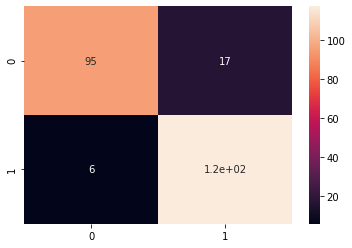

In [ ]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['STacked Classifier2',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results


In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)


In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators= 100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:

data = {
             'Random Forest2': y_pred_rfe,
                'MLP2': y_pred_mlp,
                'KNN2': y_pred_knn,
                'EXtra tree classifier2': y_pred_et500,
                'XGB2': y_pred_xgb,
                'SVC2': y_pred_svc,
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada,
                'CART': y_pred_decc,
                'GBM': y_pred_gbm }

models = pd.DataFrame(data)

for column in models:
    CM=confusion_matrix(y_test,models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

NameError: ignored

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()


In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ',l='-',lw=1.0):
  from sklearn.metrics import precision_recall_curve, average_precision_score
  precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1])

  average_precision = average_precision_score(y_test, y_proba[:,1],average="micro")

  ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='stacking classifier',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test), label='Random Forest Classifier',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('precision-recall_curves')
sns.despine()

# feature importance

In [ ]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')